# CIFAR -10 Classification
Clone Github repo with all the modules

In [1]:
!pwd
%cd /content/EVA5

/content
/content/EVA5


In [2]:
#!git clone https://github.com/vigneshbabupj/EVA5.git
!git pull

Already up to date.


In [3]:
%cd /content/EVA5/models/

/content/EVA5/models


In [4]:
!ls
from resnet import ResNet18

densenet.py	 lenet.py	   __pycache__	shufflenet.py
dpn.py		 mobilenet.py	   regnet.py	shufflenetv2.py
efficientnet.py  mobilenetv2.py    resnet.py	vgg.py
googlenet.py	 pnasnet.py	   resnext.py
__init__.py	 preact_resnet.py  senet.py


In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim

Import Modules from Github repo

In [6]:
%cd ../
#import Different modules
#from eva_model import Assign_7_Cifar10_model
from eva_data_loader import CIFAR10_dataloader
from eva_train import train
from eva_test import test
from  eva_utils import incorrect_images
import eva_regularization as rg

/content/EVA5


Use GPU engine

In [7]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

seed=121

torch.manual_seed(seed)

print("Using Cuda : ", use_cuda)


Using Cuda :  True


## Data Loader

In [8]:
Batch_Size = 128

train_loader,test_loader, classes = CIFAR10_dataloader(Batch_Size, use_cuda)

Files already downloaded and verified
Files already downloaded and verified


## Model Summary

In [9]:
from torchsummary import summary

model = ResNet18().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Model Traning 

In [10]:
model = ResNet18().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=lambda_l2)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, lambda_l1,criterion)
    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

    #scheduler.step()
    test_acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)

#model_file = 'models/'+versions+'.pth'
#torch.save(model.state_dict(), model_file)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train: Batch id: 390 	Loss: 0.975597	 Accuracy:47.756: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.009629, Accuracy: 5950/10000 (59.500%)

EPOCH: 1


Train: Batch id: 390 	Loss: 0.712126	 Accuracy:67.792: 100%|██████████| 391/391 [00:48<00:00,  8.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.007291, Accuracy: 7011/10000 (70.110%)

EPOCH: 2


Train: Batch id: 390 	Loss: 0.499180	 Accuracy:75.966: 100%|██████████| 391/391 [00:49<00:00,  7.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005283, Accuracy: 7702/10000 (77.020%)

EPOCH: 3


Train: Batch id: 390 	Loss: 0.578180	 Accuracy:79.814: 100%|██████████| 391/391 [00:49<00:00,  7.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005327, Accuracy: 7775/10000 (77.750%)

EPOCH: 4


Train: Batch id: 390 	Loss: 0.550007	 Accuracy:82.500: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004344, Accuracy: 8187/10000 (81.870%)

EPOCH: 5


Train: Batch id: 390 	Loss: 0.472968	 Accuracy:84.454: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004504, Accuracy: 8181/10000 (81.810%)

EPOCH: 6


Train: Batch id: 390 	Loss: 0.388730	 Accuracy:85.668: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004026, Accuracy: 8298/10000 (82.980%)

EPOCH: 7


Train: Batch id: 390 	Loss: 0.334825	 Accuracy:87.138: 100%|██████████| 391/391 [00:49<00:00,  7.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003746, Accuracy: 8448/10000 (84.480%)

EPOCH: 8


Train: Batch id: 390 	Loss: 0.630543	 Accuracy:88.164: 100%|██████████| 391/391 [00:49<00:00,  7.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003863, Accuracy: 8476/10000 (84.760%)

EPOCH: 9


Train: Batch id: 390 	Loss: 0.226569	 Accuracy:88.982: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003615, Accuracy: 8499/10000 (84.990%)

EPOCH: 10


Train: Batch id: 390 	Loss: 0.288234	 Accuracy:89.796: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003129, Accuracy: 8696/10000 (86.960%)

EPOCH: 11


Train: Batch id: 390 	Loss: 0.308233	 Accuracy:90.476: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003218, Accuracy: 8706/10000 (87.060%)

EPOCH: 12


Train: Batch id: 390 	Loss: 0.138219	 Accuracy:91.114: 100%|██████████| 391/391 [00:49<00:00,  7.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003511, Accuracy: 8570/10000 (85.700%)

EPOCH: 13


Train: Batch id: 390 	Loss: 0.277671	 Accuracy:91.746: 100%|██████████| 391/391 [00:49<00:00,  7.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003279, Accuracy: 8748/10000 (87.480%)

EPOCH: 14


Train: Batch id: 390 	Loss: 0.160330	 Accuracy:92.120: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003114, Accuracy: 8752/10000 (87.520%)

EPOCH: 15


Train: Batch id: 390 	Loss: 0.263777	 Accuracy:92.718: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003347, Accuracy: 8760/10000 (87.600%)

EPOCH: 16


Train: Batch id: 390 	Loss: 0.195359	 Accuracy:93.256: 100%|██████████| 391/391 [00:49<00:00,  7.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003364, Accuracy: 8711/10000 (87.110%)

EPOCH: 17


Train: Batch id: 390 	Loss: 0.148174	 Accuracy:93.198: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.002893, Accuracy: 8898/10000 (88.980%)

EPOCH: 18


Train: Batch id: 390 	Loss: 0.325794	 Accuracy:94.198: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003120, Accuracy: 8851/10000 (88.510%)

EPOCH: 19


Train: Batch id: 390 	Loss: 0.109705	 Accuracy:94.406: 100%|██████████| 391/391 [00:49<00:00,  7.92it/s]



Test set: loss: 0.003384, Accuracy: 8803/10000 (88.030%)



## See few Misclassified Images

/content/EVA5/eva_utils.py:55: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = (pred.eq(target.data.view_as(pred))==False).nonzero() ## store incorrect images
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


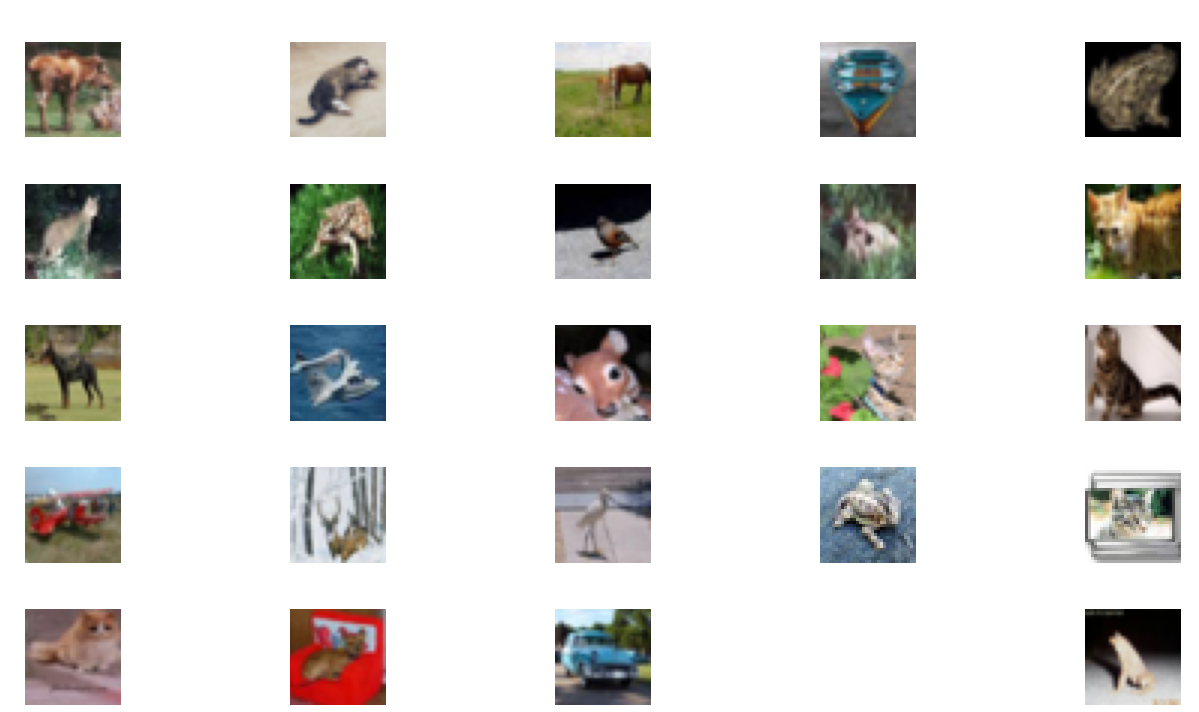

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

incorrect = incorrect_images(model, device, test_loader)
incorrect_examples = incorrect['images']
incorrect_pred = incorrect['Pred']
incorrect_target = incorrect['target']

inv_normalize = transforms.Normalize(
  mean=[-0.4890062/0.264582, -0.47970363/0.258996, -0.47680542/0.25643882],
  std=[1/0.264582, 1/0.258996, 1/0.25643882]
)


fig = plt.figure(figsize=(20,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  #plt.tight_layout(pad=0, w_pad=0, h_pad=0.4)
  #incorrect_examples_inv = inv_normalize(incorrect_examples[i])
  

  incorrect_examples_temp = inv_normalize(incorrect_examples[i])
  incorrect_examples_temp = incorrect_examples_temp.cpu().numpy()

  plt.imshow(np.transpose(incorrect_examples_temp, (1, 2, 0)).squeeze())
  plt.title(f"Predicted:{classes[incorrect_pred[i]]} \n Target:{classes[incorrect_target[i]]}",color='white',fontsize=16)
  plt.axis('off')
  plt.tight_layout() 
  

#plt.savefig('/content/drive/My Drive/models/incorrect_images.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Check Accuracy of each class



In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 96 %
Accuracy of   car : 97 %
Accuracy of  bird : 87 %
Accuracy of   cat : 55 %
Accuracy of  deer : 89 %
Accuracy of   dog : 97 %
Accuracy of  frog : 82 %
Accuracy of horse : 84 %
Accuracy of  ship : 95 %
Accuracy of truck : 96 %
